In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import numpy as np

### Exploración de BD

In [ ]:

segmentation_file = '../data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-seg.nii.gz'
t1_file = '../data/ASNR-MICCAI-BraTS2023-GLI-Challenge-ValidationData/BraTS-GLI-00001-000/BraTS-GLI-00001-000-t1c.nii.gz'
t1gd_file = '../data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t1n.nii.gz'
t2_file = '../data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t2f.nii.gz'
t2_flair_file = '../data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t2w.nii.gz'

In [20]:
total_train = os.listdir('../data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/')
print("Total training patients: ", len(total_train))
total_val = os.listdir('../data/ASNR-MICCAI-BraTS2023-GLI-Challenge-ValidationData/')
print("Total validation patients: ", len(total_val))
seg_img = nib.load(segmentation_file)
seg_img = nib.load(segmentation_file)
t1_img = nib.load(t1_file)
t1gd_img = nib.load(t1gd_file)
t2_img = nib.load(t2_file)
t2_flair_img = nib.load(t2_flair_file)

seg_data = seg_img.get_fdata()
t1_data = t1_img.get_fdata()
t1gd_data = t1gd_img.get_fdata()
t2_data = t2_img.get_fdata()
t2_flair_data = t2_flair_img.get_fdata()
print("In general each .nii file has the following shape: ", seg_data.shape)
print("In total in axial view we have: ", seg_data.shape[2]*len(total_train), "slices")
print("In total in sagittal view we have: ", seg_data.shape[0]*len(total_train), "slices")
print("In total in coronal view we have: ", seg_data.shape[1]*len(total_train), "slices")

Total training patients:  1251
Total validation patients:  219
In general each .nii file has the following shape:  (240, 240, 155)
In total in axial view we have:  193905 slices
In total in sagittal view we have:  300240 slices
In total in coronal view we have:  300240 slices


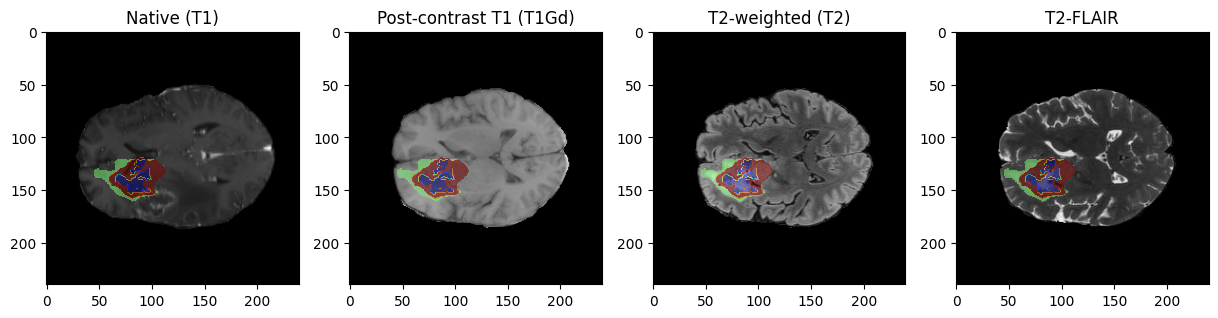

In [13]:
##########################################################################33
# PLOTTING
##########################################################################33



slice_index = seg_data.shape[2] // 2

mask = np.isin(seg_data[:, :, slice_index], [1, 2, 3])

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(t1_data[:, :, t1_data.shape[2] // 2], cmap='gray')
axes[0].imshow(np.where(mask, seg_data[:, :, slice_index], np.nan), cmap='jet', alpha=0.5)
axes[0].set_title('Native (T1)')


axes[1].imshow(t1gd_data[:, :, t1gd_data.shape[2] // 2], cmap='gray')
axes[1].imshow(np.where(mask, seg_data[:, :, slice_index], np.nan), cmap='jet', alpha=0.5)
axes[1].set_title('Post-contrast T1 (T1Gd)')


axes[2].imshow(t2_data[:, :, t2_data.shape[2] // 2], cmap='gray')
axes[2].imshow(np.where(mask, seg_data[:, :, slice_index], np.nan), cmap='jet', alpha=0.5)
axes[2].set_title('T2-weighted (T2)')

axes[3].imshow(t2_flair_data[:, :, t2_flair_data.shape[2] // 2], cmap='gray')
axes[3].imshow(np.where(mask, seg_data[:, :, slice_index], np.nan), cmap='jet', alpha=0.5)
axes[3].set_title('T2-FLAIR')

plt.show()


In [20]:
import os
import shutil
import random

def create_folders_structure(root_folder, output_folder, random_seed=42):

    random.seed(random_seed)

    patient_folders = [f for f in os.listdir(root_folder) if f.startswith('BraTS-GLI-')]
    random.shuffle(patient_folders)
    print(patient_folders)
   
    training_data_folder = os.path.join(output_folder, 'BraTS2023_TrainingVolumes', 'Data')
    training_mask_folder = os.path.join(output_folder, 'BraTS2023_TrainingVolumes', 'Mask')
    test_data_folder = os.path.join(output_folder, 'BraTS2023_TestVolumes', 'Data')
    test_mask_folder = os.path.join(output_folder, 'BraTS2023_TestVolumes', 'Mask')

    for folder in [training_data_folder, training_mask_folder, test_data_folder, test_mask_folder]:
        os.makedirs(folder, exist_ok=True)

    split_index = int(0.8 * len(patient_folders))

    for idx, patient_folder in enumerate(patient_folders):
       
        t1c_file = os.path.join(root_folder, patient_folder, f"{patient_folder}-t1c.nii.gz")
        seg_file = os.path.join(root_folder, patient_folder, f"{patient_folder}-seg.nii.gz")
        #print(t1c_file)
        data_folder = training_data_folder if idx < split_index else test_data_folder
        mask_folder = training_mask_folder if idx < split_index else test_mask_folder
        #print(data_folder)
        shutil.copy(t1c_file, os.path.join(data_folder, f"{patient_folder}.nii.gz"))
        shutil.copy(seg_file, os.path.join(mask_folder, f"{patient_folder}.nii.gz"))


root_folder = "/media/user_home0/srodriguez47/ddpm/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData"
output_folder = "/home/srodriguez47/ddpm/BraTS2023_StructuredData"
random_seed = 42

create_folders_structure(root_folder, output_folder, random_seed)


['BraTS-GLI-01195-000', 'BraTS-GLI-01222-000', 'BraTS-GLI-01004-000', 'BraTS-GLI-00211-000', 'BraTS-GLI-01408-000', 'BraTS-GLI-00533-000', 'BraTS-GLI-01522-000', 'BraTS-GLI-01303-000', 'BraTS-GLI-01134-000', 'BraTS-GLI-00651-000', 'BraTS-GLI-00543-000', 'BraTS-GLI-00540-001', 'BraTS-GLI-01515-000', 'BraTS-GLI-01094-000', 'BraTS-GLI-00694-001', 'BraTS-GLI-00233-000', 'BraTS-GLI-00045-001', 'BraTS-GLI-01068-000', 'BraTS-GLI-00030-000', 'BraTS-GLI-01286-000', 'BraTS-GLI-01469-000', 'BraTS-GLI-01536-000', 'BraTS-GLI-01097-000', 'BraTS-GLI-00811-000', 'BraTS-GLI-00736-000', 'BraTS-GLI-00607-001', 'BraTS-GLI-01344-000', 'BraTS-GLI-01158-000', 'BraTS-GLI-00061-000', 'BraTS-GLI-01125-000', 'BraTS-GLI-00209-000', 'BraTS-GLI-00127-000', 'BraTS-GLI-00324-000', 'BraTS-GLI-01204-000', 'BraTS-GLI-00555-001', 'BraTS-GLI-01200-000', 'BraTS-GLI-00625-000', 'BraTS-GLI-01071-000', 'BraTS-GLI-01476-000', 'BraTS-GLI-00124-000', 'BraTS-GLI-00429-000', 'BraTS-GLI-00537-000', 'BraTS-GLI-01419-000', 'BraTS-GLI

In [7]:
import os
import shutil
import random
import nibabel as nib
from PIL import Image
from tqdm import tqdm

def extract_and_save_axial_slices(input_file, output_directory, patient_folder):
    # Load the NIfTI file
    img = nib.load(input_file)

    # Get the image data as a 3D numpy array
    img_data = img.get_fdata()

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Iterate through axial slices and save each as a separate JPEG image
    for slice_idx in tqdm(range(img_data.shape[2]), desc=f"Processing {patient_folder}"):
        axial_slice = img_data[:, :, slice_idx]
    
        axial_slice = ((axial_slice - axial_slice.min()) / (axial_slice.max() - axial_slice.min()) * 255.9).astype('uint8')

        # Create a PIL Image from the numpy array
        img = Image.fromarray(axial_slice)

        # Save the image as JPEG with the desired naming convention
        output_filename = os.path.join(output_directory, f"{patient_folder}-{slice_idx + 1}.jpg")
        img.save(output_filename)

def process_data(root_folder, output_folder, random_seed=42):
    # Set the random seed for reproducibility
    random.seed(random_seed)

    # List all patient folders in the root folder
    patient_folders = [f for f in os.listdir(root_folder) if f.startswith('BraTS-GLI-')]
    
    # Randomly shuffle patient folders
    random.shuffle(patient_folders)

    # Define the output folder for axial slices
    axial_slices_folder = os.path.join(output_folder, 'BraTS2023_AxialSlices')

    # Create output folder if it doesn't exist
    os.makedirs(axial_slices_folder, exist_ok=True)

    # Determine the split index for 80/20 split
    split_index = int(0.8 * len(patient_folders))

    # Iterate through patient folders and extract/save axial slices
    for idx, patient_folder in enumerate(patient_folders):
        # Identify the files to process
        t1c_file = os.path.join(root_folder, patient_folder, f"{patient_folder}-t1c.nii.gz")
        seg_file = os.path.join(root_folder, patient_folder, f"{patient_folder}-seg.nii.gz")

        # Choose the appropriate output folders based on the split index
        data_folder = os.path.join(axial_slices_folder, 'Train', 'Data') if idx < split_index else os.path.join(axial_slices_folder, 'Test', 'Data')
        mask_folder = os.path.join(axial_slices_folder, 'Train', 'Mask') if idx < split_index else os.path.join(axial_slices_folder, 'Test', 'Mask')

        # Extract and save axial slices for 'Data' folder
        extract_and_save_axial_slices(t1c_file, data_folder, patient_folder)

        # Extract and save axial slices for 'Mask' folder
        extract_and_save_axial_slices(seg_file, mask_folder, patient_folder)

    print("Processing complete.")

if __name__ == "__main__":
    # Specify the root folder containing patient folders
    root_folder = "/media/user_home0/srodriguez47/ddpm/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData"

    # Specify the output folder for the axial slices
    output_folder = "/media/user_home0/srodriguez47/ddpm/BraTS2023_StructuredData"

    # Set the random seed for reproducibility
    random_seed = 42

    # Process the data and create the desired folder structure for axial slices
    process_data(root_folder, output_folder, random_seed)


Processing BraTS-GLI-01195-000:   0%|          | 0/155 [00:00<?, ?it/s]

/tmp/ipykernel_22865/3746043395.py:23: RuntimeWarning: invalid value encountered in divide
  axial_slice = ((axial_slice - axial_slice.min()) / (axial_slice.max() - axial_slice.min()) * 255.9).astype('uint8')
/tmp/ipykernel_22865/3746043395.py:23: RuntimeWarning: invalid value encountered in cast
  axial_slice = ((axial_slice - axial_slice.min()) / (axial_slice.max() - axial_slice.min()) * 255.9).astype('uint8')
Processing BraTS-GLI-00022-000: 100%|██████████| 155/155 [00:00<00:00, 983.56it/s]

Processing complete.


In [3]:
from PIL import Image
lista_train = "../BraTS2023_StructuredData/BraTS2023_AxialSlices/Train/Data"
lista_train_seg = "../BraTS2023_StructuredData/BraTS2023_AxialSlices/Train/Mask"
lista_test = "../BraTS2023_StructuredData/BraTS2023_AxialSlices/Test/Data"
lista_test_seg = "../BraTS2023_StructuredData/BraTS2023_AxialSlices/Test/Mask"

lista_total = os.listdir(lista_train)
print("Total training slices: ", len(lista_total))
lista_total = os.listdir(lista_test)
print("Total test slices: ", len(lista_total))

black_images = []

for img_name in os.listdir(lista_train):
    img_path = os.path.join(lista_train, img_name)
    img_path_seg = os.path.join(lista_train_seg, img_name)
    img = Image.open(img_path)
    if not np.any(np.array(img)):
        black_images.append(img_name)
        os.remove(img_path)
        os.remove(img_path_seg)
print("Total black images in training: ", len(black_images))
print("Total training slices after removing black images: ", len(os.listdir(lista_train)))
black_images_test = []
for img_name in os.listdir(lista_test):
    img_path = os.path.join(lista_test, img_name)
    img_path_seg = os.path.join(lista_test_seg, img_name)
    img = Image.open(img_path)
    if not np.any(np.array(img)):
        black_images_test.append(img_name)
        os.remove(img_path)
        os.remove(img_path_seg)

print("Total black images in test: ", len(black_images_test))
print("Total test slices after removing black images: ", len(os.listdir(lista_test)))


Total training slices:  155000
Total test slices:  38905
Total black images in training:  15972
Total training slices after removing black images:  139028
Total black images in test:  3874
Total test slices after removing black images:  35031


In [ ]:
assert len(os.listdir(lista_train)) == len(os.listdir(lista_train_seg))
assert len(os.listdir(lista_test)) == len(os.listdir(lista_test_seg))

In [16]:
imgexample = "/media/user_home0/srodriguez47/ddpm/BraTS2023_StructuredData/BraTS2023_AxialSlices/Test/Data/BraTS-GLI-00016-000-50.jpg"
imgexample2 = "/media/user_home0/srodriguez47/ddpm/BraTS2023_StructuredData/BraTS2023_AxialSlices/Test/Data/BraTS-GLI-00016-000-1.jpg"

img = Image.open(imgexample2)
black_pixel_count = 0
black_pixel_count = np.sum(np.all(np.array(img) == 0, axis=1))
print(black_pixel_count)
print(np.shape(img))


240
(240, 240)
